In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Greenland = pd.read_excel(filepath, sheet_name='Greenland-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Greenland)
fp.date_time(Greenland)

,Extent,Date
0,1076123.146,1979-01-01
1,1099248.063,1979-02-01
2,1036964.901,1979-03-01
3,958927.937,1979-04-01
4,823812.694,1979-05-01
...,...,...
533,721350.515,2023-06-01
534,459033.164,2023-07-01
535,282045.909,2023-08-01
536,270397.608,2023-09-01


In [5]:
scaler = MinMaxScaler()
Greenland['Extent'] = scaler.fit_transform(Greenland['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 5
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Greenland['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((522, 12, 1), (522,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Greenland_model_LT5/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/53 [==========================>...] - ETA: 0s - loss: 0.3136 - root_mean_squared_error: 0.5600

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 6s 80ms/step - loss: 0.3097 - root_mean_squared_error: 0.5565 - val_loss: 0.1470 - val_root_mean_squared_error: 0.3834
Epoch 2/50
40/53 [=====================>........] - ETA: 0s - loss: 0.2525 - root_mean_squared_error: 0.5024

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.2454 - root_mean_squared_error: 0.4954 - val_loss: 0.1171 - val_root_mean_squared_error: 0.3421
Epoch 3/50
41/53 [======================>.......] - ETA: 0s - loss: 0.2081 - root_mean_squared_error: 0.4562

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 55ms/step - loss: 0.2017 - root_mean_squared_error: 0.4492 - val_loss: 0.0940 - val_root_mean_squared_error: 0.3066
Epoch 4/50
52/53 [============================>.] - ETA: 0s - loss: 0.1653 - root_mean_squared_error: 0.4066

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.1650 - root_mean_squared_error: 0.4062 - val_loss: 0.0691 - val_root_mean_squared_error: 0.2629
Epoch 5/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1371 - root_mean_squared_error: 0.3703

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 52ms/step - loss: 0.1336 - root_mean_squared_error: 0.3655 - val_loss: 0.0571 - val_root_mean_squared_error: 0.2389
Epoch 6/50
43/53 [=======================>......] - ETA: 0s - loss: 0.1082 - root_mean_squared_error: 0.3289

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.1054 - root_mean_squared_error: 0.3247 - val_loss: 0.0430 - val_root_mean_squared_error: 0.2074
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0798 - root_mean_squared_error: 0.2826

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0833 - root_mean_squared_error: 0.2886 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1860
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0651 - root_mean_squared_error: 0.2551

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0651 - root_mean_squared_error: 0.2551 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1506
Epoch 9/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0486 - root_mean_squared_error: 0.2205

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.0486 - root_mean_squared_error: 0.2205 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354
Epoch 10/50
52/53 [============================>.] - ETA: 0s - loss: 0.0379 - root_mean_squared_error: 0.1947

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0379 - root_mean_squared_error: 0.1947 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1277
Epoch 11/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0297 - root_mean_squared_error: 0.1723

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.0295 - root_mean_squared_error: 0.1718 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 12/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0246 - root_mean_squared_error: 0.1567

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0247 - root_mean_squared_error: 0.1573 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1116
Epoch 13/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0205 - root_mean_squared_error: 0.1432

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.0197 - root_mean_squared_error: 0.1403 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 14/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.1320

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1081
Epoch 15/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.1194

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1021
Epoch 16/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0151 - root_mean_squared_error: 0.1228 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 17/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1142

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0131 - root_mean_squared_error: 0.1145 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0917
Epoch 18/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1112

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0911
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0145 - root_mean_squared_error: 0.1203 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0961
Epoch 20/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1120
Epoch 21/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1101
Epoch 22/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1115

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0907
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0106 - root_mean_squared_error: 0.1031 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0125 - root_mean_squared_error: 0.1117 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0911
Epoch 25/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 26/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1423
Epoch 27/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.1093

INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


INFO:tensorflow:Assets written to: Greenland_model_LT5\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899
Epoch 28/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0922
Epoch 29/50
53/53 [==============================] - 0s 4ms/step - loss: 0.0130 - root_mean_squared_error: 0.1140 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1325
Epoch 30/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1394
Epoch 31/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1000
Epoch 32/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0102 - root_mean_squared_error: 0.1011 - val_loss: 0.0082 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.2202502528826396 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

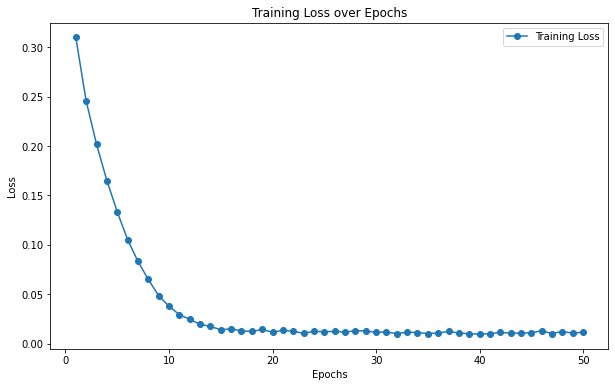

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

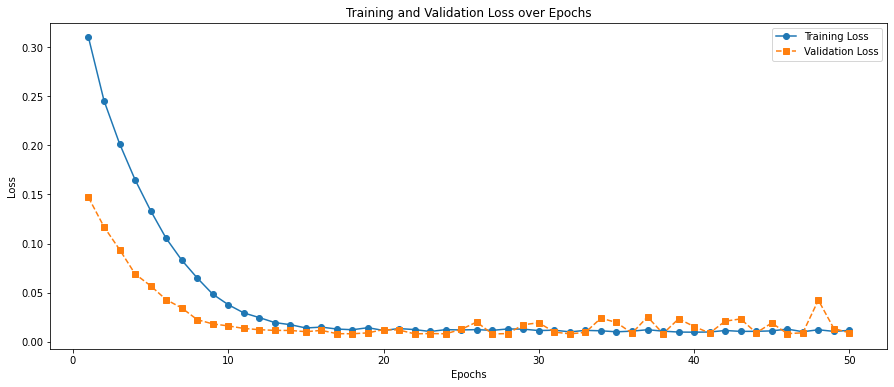

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Greenland_model_LT5/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.10446694984879812
MAE : 0.09068808929913091


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,248636.656250,212475.431
1,270191.781250,386546.857
2,374730.656250,547183.986
3,471940.125000,584596.262
4,576002.062500,584830.109
5,638041.625000,641562.292
6,644017.187500,734946.437
7,668022.500000,777596.225
8,662369.000000,687087.673
9,518627.000000,622337.816


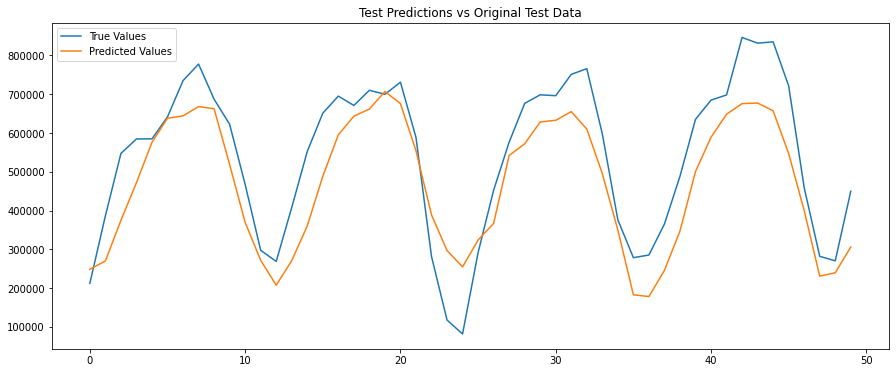

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 2ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

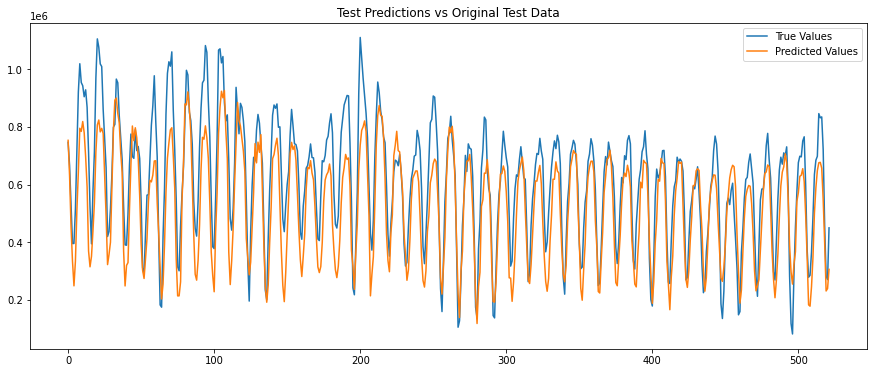

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()